## reading data 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data (2).csv")

In [3]:
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


## understanding the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [5]:
data.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


## check nulls

In [6]:
data.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

## check duplicated

In [7]:
data.duplicated().sum()

0

## check outlayers

In [8]:
for i in data.columns:
    if(data[i].dtype in ["float64","int64"]):
        print(i)
        print(data[i].describe())

Age
count    128061.000000
mean         26.349091
std           4.908022
min          18.000000
25%          23.000000
50%          25.000000
75%          29.000000
max          57.000000
Name: Age, dtype: float64
Education
count    128061.000000
mean          0.411156
std           0.492045
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Education, dtype: float64
Introversion Score
count    128061.000000
mean          4.996387
std           2.888636
min           0.000040
25%           2.490710
50%           4.993640
75%           7.500170
max           9.999990
Name: Introversion Score, dtype: float64
Sensing Score
count    128061.000000
mean          5.081893
std           1.183236
min           0.000000
25%           4.315659
50%           5.124169
75%           5.892288
max           9.788815
Name: Sensing Score, dtype: float64
Thinking Score
count    128061.000000
mean          4.988040
std           2.88601

In [9]:
import matplotlib.pyplot as plt

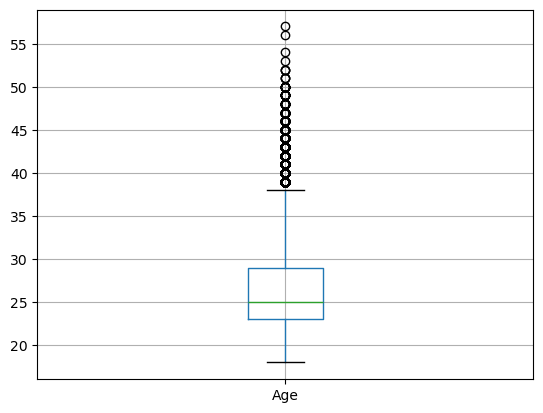

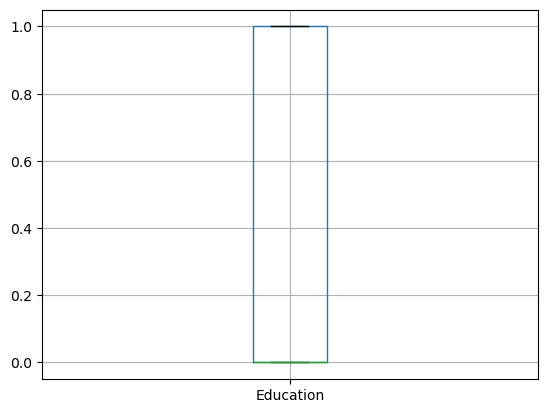

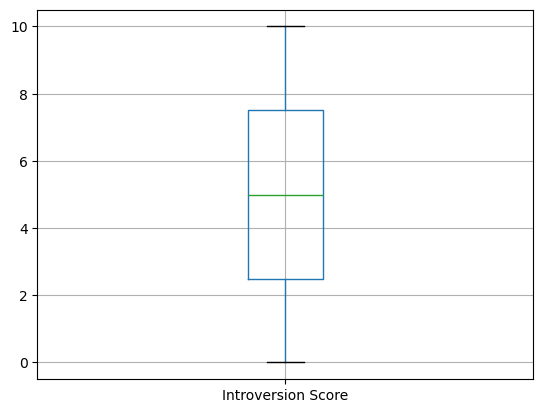

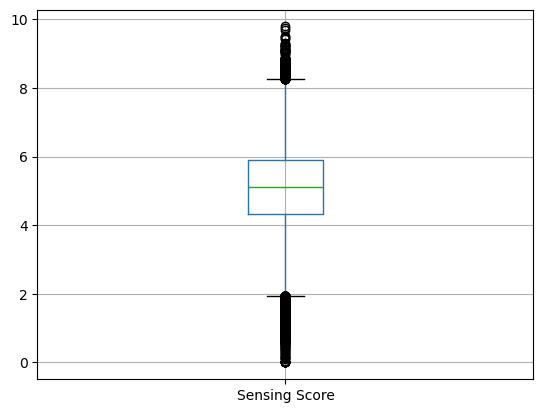

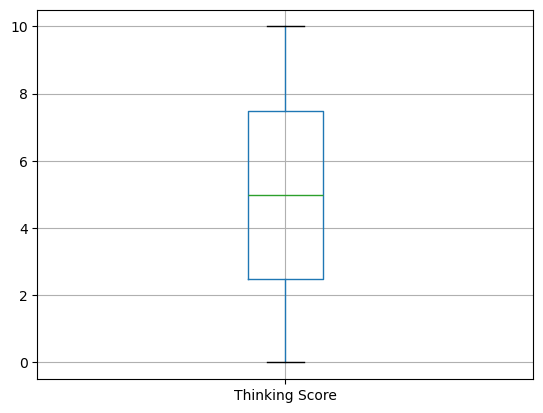

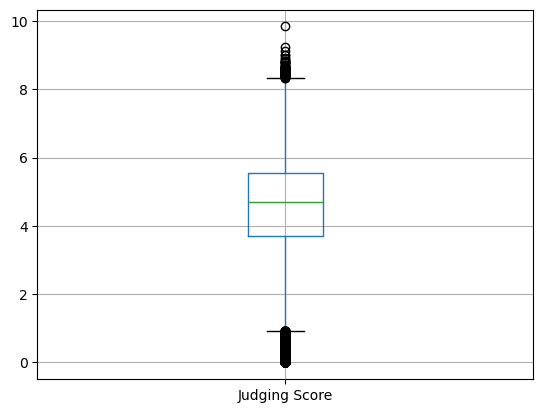

In [10]:
for i in data.columns:
    if(data[i].dtype in ["float64","int64"]):
        data.boxplot(column=i)
        plt.show()

In [11]:
Q1=data["Age"].quantile(0.25)
Q3=data["Age"].quantile(.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is :{max}")
print(f"min is {min}")
outlayers=data[data["Age"]>max]
data=data[data["Age"]<=max]
print(f"shape of outlayers{outlayers.shape}")
print(f"shape of data {data.shape}")

max is :38.0
min is 14.0
shape of outlayers(2692, 9)
shape of data (125369, 9)


## take sample from outlayer age because its real data

In [12]:
out1=outlayers.sample(frac=0.2)

In [13]:
Q1=data["Sensing Score"].quantile(0.25)
Q3=data["Sensing Score"].quantile(.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is :{max}")
print(f"min is {min}")
outlayers=data[(data["Sensing Score"]>max)  | (data["Sensing Score"]<min)]
data=data[(data["Sensing Score"]<=max) & (data["Sensing Score"]>=min)]
print(f"shape of outlayers{outlayers.shape}")
print(f"shape of data {data.shape}")

max is :8.258689874166985
min is 1.9506565396523414
shape of outlayers(1138, 9)
shape of data (124231, 9)


In [14]:
Q1=data["Judging Score"].quantile(0.25)
Q3=data["Judging Score"].quantile(.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is :{max}")
print(f"min is {min}")
outlayers=data[(data["Judging Score"]>max)  | (data["Judging Score"]<min)]
data=data[(data["Judging Score"]<=max) & (data["Judging Score"]>=min)]
print(f"shape of outlayers{outlayers.shape}")
print(f"shape of data {data.shape}")

max is :8.337796083496888
min is 0.9319868809789775
shape of outlayers(1463, 9)
shape of data (122768, 9)


In [15]:
data=pd.concat([data,out1])
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
19715,43.0,Female,1,5.30854,6.138312,6.58273,6.598572,Unknown,ESTP
22586,40.0,Female,0,2.29581,4.360907,2.08076,6.057473,Sports,INFJ
97694,43.0,Female,0,9.43016,5.994226,6.34897,4.866507,Unknown,ENTP
30611,46.0,Male,0,0.81364,6.847479,9.94866,4.646626,Others,ISTP


## check len of unique category of data

In [16]:
len(data["Gender"].unique())

2

In [17]:
len(data["Interest"].unique())

5

In [18]:
len(data["Personality"].unique())

16

## check balance of Gender

In [19]:
data["Gender"].value_counts()

Gender
Male      67841
Female    55465
Name: count, dtype: int64

In [20]:
#balanced

## check balance of Interest 

In [21]:
data["Interest"].value_counts()

Interest
Unknown       47031
Arts          24580
Others        20900
Technology    18362
Sports        12433
Name: count, dtype: int64

In [22]:
data["Interest"]=data["Interest"].apply(lambda x:x if x in ["Arts","Technology","Sports"] else None)

In [23]:
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,None,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,None,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,None,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
19715,43.0,Female,1,5.30854,6.138312,6.58273,6.598572,None,ESTP
22586,40.0,Female,0,2.29581,4.360907,2.08076,6.057473,Sports,INFJ
97694,43.0,Female,0,9.43016,5.994226,6.34897,4.866507,None,ENTP
30611,46.0,Male,0,0.81364,6.847479,9.94866,4.646626,None,ISTP


In [24]:
data.dropna(inplace=True)

In [25]:
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
7,27.0,Female,0,5.24958,5.963290,1.16176,5.873350,Sports,ENFJ
9,24.0,Female,0,1.62636,5.160906,7.25476,3.825849,Technology,INTP
11,29.0,Female,1,7.69101,4.198218,9.22787,6.078683,Arts,ENTP
...,...,...,...,...,...,...,...,...,...
47696,40.0,Female,0,4.15901,6.327409,6.54653,3.247494,Technology,ESTP
90270,41.0,Male,0,7.10274,2.995241,6.54863,5.951251,Technology,ENTP
127351,40.0,Male,1,8.29724,5.916711,0.41299,3.591577,Arts,ENFP
61466,40.0,Female,0,5.37543,2.644265,7.27895,4.148485,Arts,ENTP


In [26]:
data["Interest"].value_counts()

Interest
Arts          24580
Technology    18362
Sports        12433
Name: count, dtype: int64

In [27]:
## not balanced

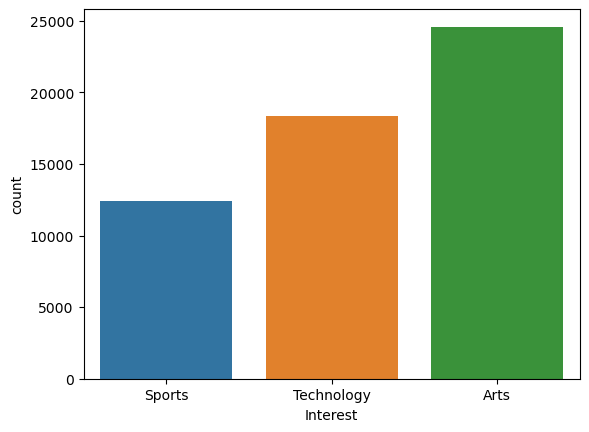

In [28]:
import seaborn as sns
sns.countplot(x="Interest",data=data)
plt.show()

## use oversambling to balance Interest

In [29]:
x=data.drop("Interest",inplace=False,axis=1)
y=data["Interest"]
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(x, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
print(balanced_data["Interest"].value_counts())

Interest
Sports        24580
Technology    24580
Arts          24580
Name: count, dtype: int64


In [30]:
#balanced

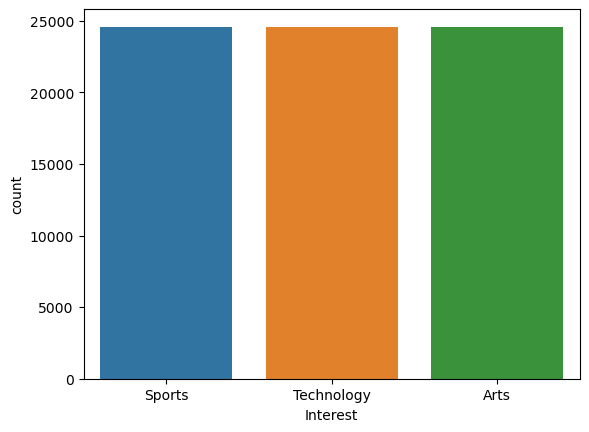

In [31]:
import seaborn as sns
sns.countplot(x="Interest",data=balanced_data)
plt.show()

In [32]:
balanced_data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest
0,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports
1,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology
2,27.0,Female,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports
3,24.0,Female,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology
4,29.0,Female,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts
...,...,...,...,...,...,...,...,...,...
73735,35.0,Female,1,6.75113,4.476964,2.89366,3.410700,ENFP,Technology
73736,23.0,Female,1,7.61145,5.718212,4.56324,4.699017,ENFP,Technology
73737,24.0,Male,0,1.22285,3.081351,5.94989,5.146879,INFP,Technology
73738,20.0,Male,0,4.38699,5.345336,3.87160,5.498521,ENFP,Technology


## check balance of Personality

In [33]:
balanced_data["Personality"].value_counts()

Personality
ENFP    18595
ENTP    14087
INFP    13355
INTP     9724
ENFJ     3070
ESFP     2636
ENTJ     2234
INFJ     2207
ESTP     1952
ISFP     1895
INTJ     1465
ISTP     1351
ESFJ      381
ISFJ      296
ESTJ      262
ISTJ      230
Name: count, dtype: int64

In [34]:
## notbalanced

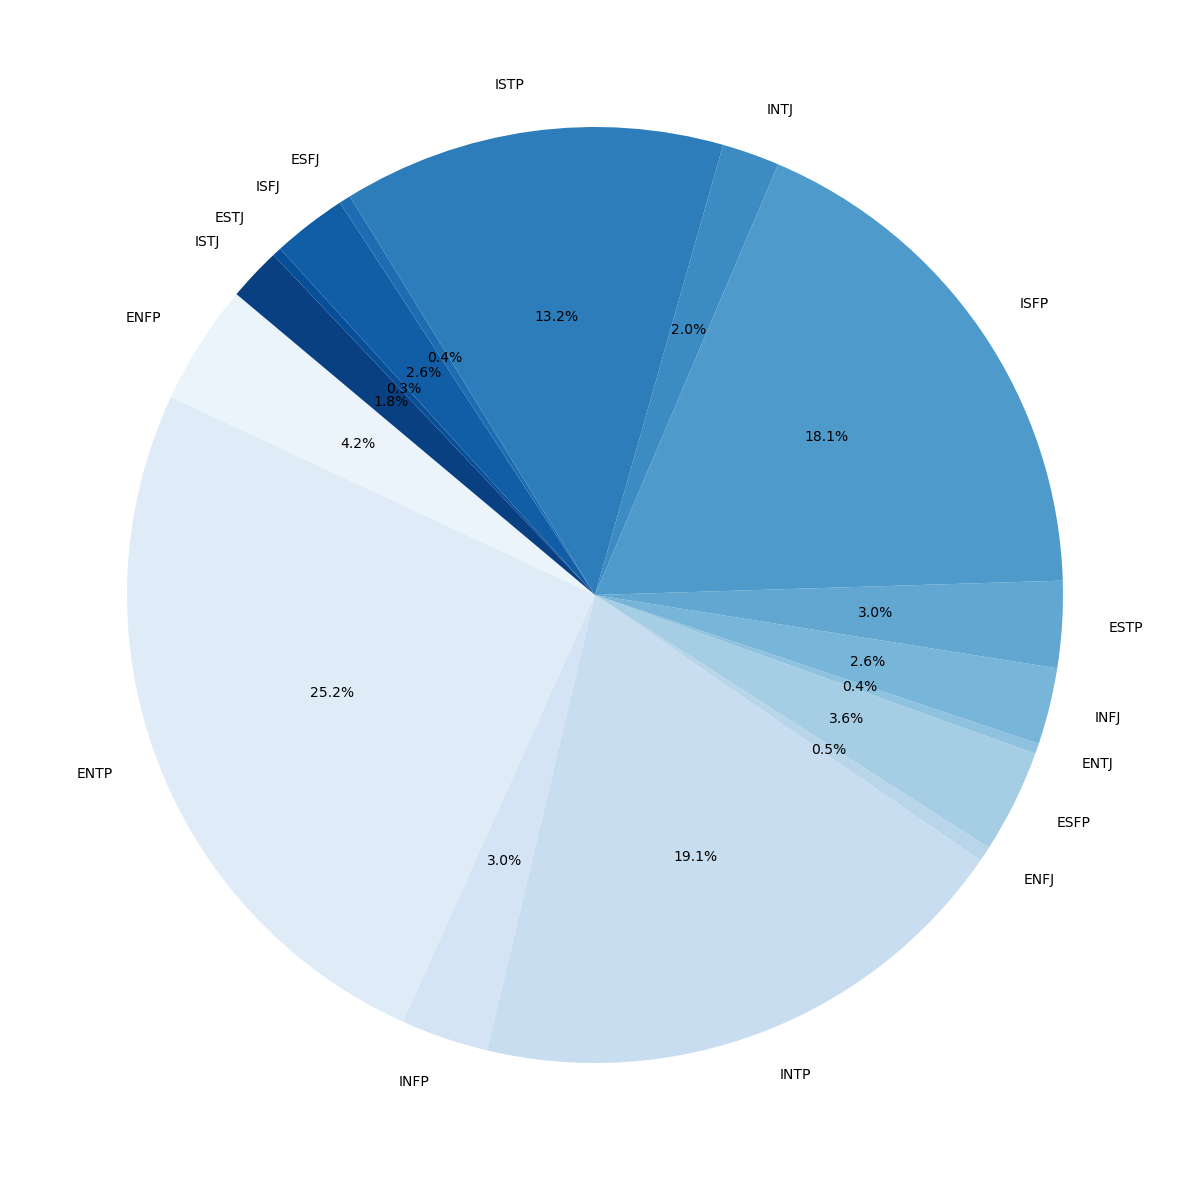

In [35]:
counts = balanced_data['Personality'].value_counts().sort_index()
palette = sns.color_palette("Blues", n_colors=len(counts))
fig = plt.figure(figsize=(18, 12))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["ENFP", "ENTP","INFP","INTP","ENFJ","ESFP","ENTJ","INFJ","ESTP","ISFP","INTJ","ISTP","ESFJ","ISFJ","ESTJ","ISTJ"])
plt.tight_layout()
plt.show()

## encoding (Gender) by label encoder

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
balanced_data['Gender_encoded'] = label_encoder.fit_transform(balanced_data['Gender'])

In [37]:
balanced_data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest,Gender_encoded
0,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports,0
1,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology,0
2,27.0,Female,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports,0
3,24.0,Female,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology,0
4,29.0,Female,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts,0
...,...,...,...,...,...,...,...,...,...,...
73735,35.0,Female,1,6.75113,4.476964,2.89366,3.410700,ENFP,Technology,0
73736,23.0,Female,1,7.61145,5.718212,4.56324,4.699017,ENFP,Technology,0
73737,24.0,Male,0,1.22285,3.081351,5.94989,5.146879,INFP,Technology,1
73738,20.0,Male,0,4.38699,5.345336,3.87160,5.498521,ENFP,Technology,1


In [38]:
balanced_data.drop("Gender",inplace=True,axis=1)

In [39]:
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest,Gender_encoded
0,27.0,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports,0
1,36.0,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology,0
2,27.0,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports,0
3,24.0,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology,0
4,29.0,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts,0
...,...,...,...,...,...,...,...,...,...
73735,35.0,1,6.75113,4.476964,2.89366,3.410700,ENFP,Technology,0
73736,23.0,1,7.61145,5.718212,4.56324,4.699017,ENFP,Technology,0
73737,24.0,0,1.22285,3.081351,5.94989,5.146879,INFP,Technology,1
73738,20.0,0,4.38699,5.345336,3.87160,5.498521,ENFP,Technology,1


## encoding (Interest) by labelencoder

In [40]:
label_encoder = LabelEncoder()
balanced_data['Interest_encoded'] = label_encoder.fit_transform(balanced_data['Interest'])

In [41]:
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest,Gender_encoded,Interest_encoded
0,27.0,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports,0,1
1,36.0,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology,0,2
2,27.0,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports,0,1
3,24.0,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology,0,2
4,29.0,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts,0,0
...,...,...,...,...,...,...,...,...,...,...
73735,35.0,1,6.75113,4.476964,2.89366,3.410700,ENFP,Technology,0,2
73736,23.0,1,7.61145,5.718212,4.56324,4.699017,ENFP,Technology,0,2
73737,24.0,0,1.22285,3.081351,5.94989,5.146879,INFP,Technology,1,2
73738,20.0,0,4.38699,5.345336,3.87160,5.498521,ENFP,Technology,1,2


In [42]:
balanced_data.drop("Interest",inplace=True,axis=1)
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Gender_encoded,Interest_encoded
0,27.0,0,5.85392,6.160195,0.80552,4.221421,ESFP,0,1
1,36.0,1,9.91703,4.755080,5.31469,4.677213,ENFP,0,2
2,27.0,0,5.24958,5.963290,1.16176,5.873350,ENFJ,0,1
3,24.0,0,1.62636,5.160906,7.25476,3.825849,INTP,0,2
4,29.0,1,7.69101,4.198218,9.22787,6.078683,ENTP,0,0
...,...,...,...,...,...,...,...,...,...
73735,35.0,1,6.75113,4.476964,2.89366,3.410700,ENFP,0,2
73736,23.0,1,7.61145,5.718212,4.56324,4.699017,ENFP,0,2
73737,24.0,0,1.22285,3.081351,5.94989,5.146879,INFP,1,2
73738,20.0,0,4.38699,5.345336,3.87160,5.498521,ENFP,1,2


## use smote to balance Personality(target)

In [43]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x=balanced_data.drop("Personality",inplace=False,axis=1)
y=balanced_data["Personality"]
X_resampled, y_resampled = smote.fit_resample(x, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Gender_encoded,Interest_encoded,Personality
0,27.000000,0,5.853920,6.160195,0.805520,4.221421,0,1,ESFP
1,36.000000,1,9.917030,4.755080,5.314690,4.677213,0,2,ENFP
2,27.000000,0,5.249580,5.963290,1.161760,5.873350,0,1,ENFJ
3,24.000000,0,1.626360,5.160906,7.254760,3.825849,0,2,INTP
4,29.000000,1,7.691010,4.198218,9.227870,6.078683,0,0,ENTP
...,...,...,...,...,...,...,...,...,...
297515,33.000000,1,0.381170,7.386153,8.415316,4.767880,1,2,ISTP
297516,23.000000,0,2.741246,6.220996,8.446668,4.159499,1,2,ISTP
297517,25.093766,0,0.536696,6.949253,8.209360,1.835591,0,2,ISTP
297518,35.000000,0,1.528624,6.801131,7.628365,4.196895,1,0,ISTP


In [44]:
balanced_data["Personality"].value_counts()

Personality
ESFP    18595
ENFP    18595
ENFJ    18595
INTP    18595
ENTP    18595
INFP    18595
ISTP    18595
INTJ    18595
INFJ    18595
ISFP    18595
ENTJ    18595
ESFJ    18595
ESTP    18595
ISFJ    18595
ISTJ    18595
ESTJ    18595
Name: count, dtype: int64

## split data to (x,y)

In [45]:
X=balanced_data.drop("Personality",inplace=False,axis=1)
y=balanced_data["Personality"]

## feature selection by use (SelectPercentile)

In [46]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
FeatureSelection = SelectPercentile(score_func = chi2, percentile=80) 
x = FeatureSelection.fit_transform(X, y)

In [47]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,27.000000,0.0,5.853920,6.160195,0.805520,4.221421
1,36.000000,1.0,9.917030,4.755080,5.314690,4.677213
2,27.000000,0.0,5.249580,5.963290,1.161760,5.873350
3,24.000000,0.0,1.626360,5.160906,7.254760,3.825849
4,29.000000,1.0,7.691010,4.198218,9.227870,6.078683
...,...,...,...,...,...,...
297515,33.000000,1.0,0.381170,7.386153,8.415316,4.767880
297516,23.000000,0.0,2.741246,6.220996,8.446668,4.159499
297517,25.093766,0.0,0.536696,6.949253,8.209360,1.835591
297518,35.000000,0.0,1.528624,6.801131,7.628365,4.196895


## split data (train, test)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (238016, 6)
X_test shape is  (59504, 6)
y_train shape is  (238016,)
y_test shape is  (59504,)


## train model(RandomForestClassifier) by Gridsearchcv

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'random_state': [33]
}
RandomForestClassifierModel = RandomForestClassifier()
grid_search = GridSearchCV(estimator=RandomForestClassifierModel, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("أفضل الهايبر بارامترز:", best_params)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

أفضل الهايبر بارامترز: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200, 'random_state': 33}


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=33)

## evaluation model

In [52]:
from sklearn.metrics import classification_report
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :/n ', ClassificationReport )

Classification Report is :/n                precision    recall  f1-score   support

        ENFJ       0.99      0.98      0.98      3643
        ENFP       0.96      0.94      0.95      3769
        ENTJ       0.99      0.99      0.99      3703
        ENTP       0.97      0.93      0.95      3625
        ESFJ       0.99      1.00      1.00      3682
        ESFP       0.98      0.99      0.98      3794
        ESTJ       0.99      1.00      1.00      3779
        ESTP       0.98      0.99      0.98      3642
        INFJ       0.99      0.99      0.99      3683
        INFP       0.95      0.95      0.95      3757
        INTJ       0.99      1.00      0.99      3703
        INTP       0.95      0.96      0.96      3673
        ISFJ       1.00      1.00      1.00      3647
        ISFP       0.98      0.99      0.99      3880
        ISTJ       0.99      1.00      1.00      3781
        ISTP       0.98      0.99      0.99      3743

    accuracy                           0.98     59

## train model(DecisionTreeClassifier) by Gridsearchcv

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(random_state=33)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifierModel,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("أفضل المعلمات:", best_params)
print("أفضل دقة:", best_score)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
أفضل المعلمات: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
أفضل دقة: 0.9625151247308887


DecisionTreeClassifier(criterion='entropy', random_state=33)

In [55]:
from sklearn.metrics import classification_report
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :/n ', ClassificationReport )

Classification Report is :/n                precision    recall  f1-score   support

        ENFJ       0.97      0.97      0.97      3643
        ENFP       0.93      0.93      0.93      3769
        ENTJ       0.98      0.98      0.98      3703
        ENTP       0.93      0.92      0.93      3625
        ESFJ       0.99      0.99      0.99      3682
        ESFP       0.97      0.97      0.97      3794
        ESTJ       0.99      1.00      0.99      3779
        ESTP       0.97      0.97      0.97      3642
        INFJ       0.98      0.98      0.98      3683
        INFP       0.93      0.93      0.93      3757
        INTJ       0.98      0.98      0.98      3703
        INTP       0.93      0.93      0.93      3673
        ISFJ       0.99      0.99      0.99      3647
        ISFP       0.97      0.97      0.97      3880
        ISTJ       0.99      1.00      0.99      3781
        ISTP       0.98      0.97      0.97      3743

    accuracy                           0.97     59